## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Observations over the data: 
    #Capomulin appears to have been effective at treating the tumors, however mouse i738 showed an initial shrinkage, followed by growth. This should be explored against other mice to confirm if this is systemic or an anomoly. 
    # The weight of the mouse is strongly positively correlated to the size of the tumor. Has the weight distribution of the mice across the regimens affected the effectiveness of the treatments? THis is difficult to see since have not plotted all weights against the treatment regimens. 
    # Capomulin and Ramicane both show lower tumor sizes at the end of the study when looking in comparison to Infubinol and Ceftamin, and this may indicate that these are more effective treatments. In order to confirm this, it would be necessary to compare the sizes of the tumors at timepoint zero, to the sizes of the tumor at the end of the study. 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on= 'Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
#print(combined_df.describe())
#print(len(combined_df.index))
mouse_group = combined_df.groupby('Mouse ID')
mouse_count = mouse_group['Mouse ID'].count()
print(mouse_count)

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [442]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study = combined_df.drop_duplicates()
cleaned_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_group_2 = cleaned_study.groupby('Mouse ID')
mouse_count_2 = mouse_group['Mouse ID'].count()
print(mouse_count)

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Create the stats

regimen_grouped = cleaned_study.groupby('Drug Regimen')
tumor_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
tumor_median = regimen_grouped['Tumor Volume (mm3)'].median()
tumor_var = regimen_grouped['Tumor Volume (mm3)'].var()
tumor_sd = regimen_grouped['Tumor Volume (mm3)'].std()
tumor_SEM = regimen_grouped['Tumor Volume (mm3)'].sem()
tumor_count = regimen_grouped['Tumor Volume (mm3)'].count()

# Create the table
tumor_summary = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var, 'Standard Deviation': tumor_sd, 'SEM': tumor_SEM, 'Count': tumor_count})

#Preview the summary
tumor_summary


,Mean,Median,Variance,Standard Deviation,SEM,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041,160
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

regimen_grouped.describe()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          160.0  10.831250  7.283325  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          160.0  27.050000  ...          56.259803  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                160.0  0.981250  1.084319  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar and Pie Charts

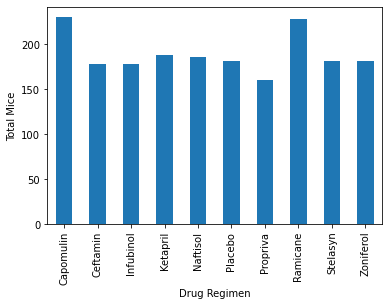

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
totalmicefortreatment = cleaned_study.groupby('Drug Regimen')
totalmicecount = totalmicefortreatment['Drug Regimen'].count() 
#totalmicecount
mouse_bar_1 = totalmicecount.plot(kind='bar')
mouse_bar_1.set_ylabel('Total Mice');


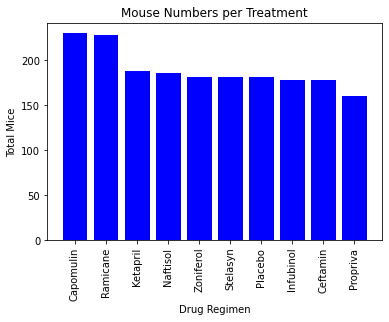

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
subjects = cleaned_study['Drug Regimen'].value_counts()
x_axis = np.arange(len(subjects))
#print(subjects)
plt.bar(x_axis, subjects, color='b', align='center')
tick_locations = [name for name in x_axis]
plt.xticks(tick_locations, subjects.index.values)
plt.xticks(rotation=90)
plt.title('Mouse Numbers per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice'); 


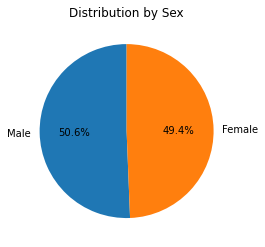

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_mice = cleaned_study['Sex'].value_counts()
pie_plot = sex_mice.plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution by Sex')
pie_plot.set_ylabel(''); 

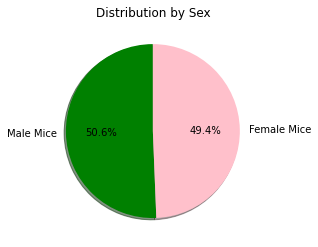

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice = cleaned_study['Sex'].value_counts()
sex_mice
plt.title('Distribution by Sex')
labels = ['Male Mice', 'Female Mice']
colors = ['green', 'pink']
plt.pie(sex_mice, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90);
    


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(cleaned_study.groupby('Mouse ID')['Timepoint'].max())
max_timepoint.rename(columns = {'Timepoint':'Max TP'}, inplace = True)

max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_merged = pd.merge(cleaned_study, max_timepoint, how='outer', on='Mouse ID')
max_tp_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max TP
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,45
1888,z969,Naftisol,Male,9,30,30,65.841013,3,45
1889,z969,Naftisol,Male,9,30,35,69.176246,4,45
1890,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_treatment = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    max_for_drug = max_tp_merged.loc[max_tp_merged['Drug Regimen'] == drug]
    final_volume = max_for_drug.loc[max_for_drug['Timepoint'] == max_for_drug['Max TP']]
    tumor_size = final_volume['Tumor Volume (mm3)']
    drug_treatment.append(tumor_size)
#drug_treatment
    
    # add subset 
quartiles = tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'IQR for {drug}: {iqr}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'Lower Bound for {drug}: {lower_bound}')
print(f'Upper Bound for {drug}: {upper_bound}')

    # Determine outliers using upper and lower bounds
outliers_count = (tumor_size.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | (final_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
print(f'Number of {drug} outliers: {outliers_count}')   

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


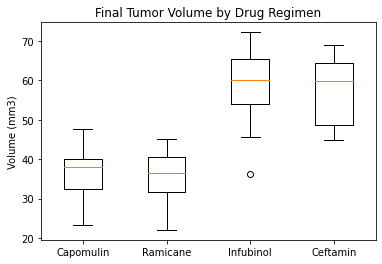

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1, ax1 = plt.subplots()
# ax1.set_title('Final Tumor Size by Drug Regimen')
# ax1.set_ylabel('Volume (mm3)')
# ax1.set_xticks(tick_locations, drugs.index)
# ax1.boxplot(drug_treatment); 
plt.boxplot(drug_treatment)
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']);

## Line and Scatter Plots

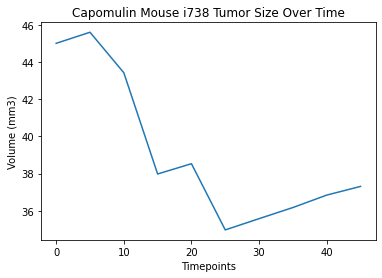

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_i738 = max_tp_merged.loc[max_tp_merged['Mouse ID'] == 'i738']
plt.plot(mouse_i738['Timepoint'], mouse_i738['Tumor Volume (mm3)'])
plt.xlabel('Timepoints')
plt.ylabel('Volume (mm3)')
plt.title('Capomulin Mouse i738 Tumor Size Over Time'); 

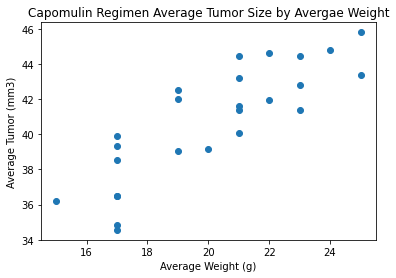

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = cleaned_study.loc[cleaned_study['Drug Regimen'] == 'Capomulin']
tumor_avg = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
#tumor_avg.head()
weight_avg = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean())
# weight_avg.head()
capolumin_avg = pd.merge(tumor_avg, weight_avg,on="Mouse ID")
capolumin_avg
x = capolumin_avg['Weight (g)']
y = capolumin_avg['Tumor Volume (mm3)']
plt.scatter(x, y, marker='o')
plt.title('Capomulin Regimen Average Tumor Size by Avergae Weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor (mm3)')

plt.show()

## Correlation and Regression

The correlation between tumor volume & mouse weight is 0.84. 


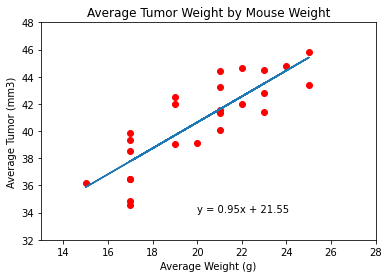

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# weight_cf = weight_avg.loc['Weight (g)']
# tumorvol_cf = tumor_avg.loc['Tumor Volume (mm3)']
correlation = st.pearsonr(x, y)
print(f'The correlation between tumor volume & mouse weight is {round(correlation[0],2)}. ')
(cr_slope, cr_int, cr_r, cr_p, cr_std_err) = linregress(x, y)
cr_fit = cr_slope * x + cr_int
line_eq = 'y = ' + str(round(cr_slope,2)) + 'x + ' + str(round(cr_int,2))
plt.scatter(x, y, marker='o', color='red')
plt.plot(x,cr_fit, cr_r)
plt.annotate(line_eq, (20,34), fontsize=10, color='black')
plt.ylim(32,48)
plt.xlim(13,28)
plt.title('Average Tumor Weight by Mouse Weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor (mm3)')

plt.show()